In [86]:
from scipy.io import wavfile
samplerate, data = wavfile.read('beepboop.wav')
len(data)

686006

In [85]:
mono_data = data[:,0]
#mono_data = data

peak = max(mono_data)
threshold = 0.2*peak

fsk = []

previous_ispositive = False
previous_timestamp = -1
previous_value = 0
for i, value in enumerate(mono_data):
    timestamp = i / samplerate
    
    crossing_up = (not previous_ispositive and previous_value < threshold and value > threshold)
    crossing_down = (previous_ispositive and previous_value > threshold and value < threshold)
    if crossing_up or crossing_down:
        previous_ispositive = not previous_ispositive
        if crossing_up:
            frequency = 1/(timestamp - previous_timestamp)
            fsk.extend([frequency] * int(samplerate / frequency)) # add weighted by frequency
            previous_timestamp = timestamp
        previous_value = value

len(fsk)

639848

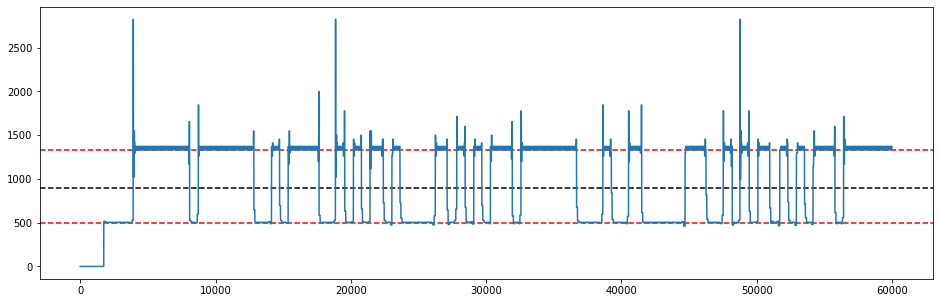

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

fsk_subset = fsk[140000:200000]
fig = plt.figure(figsize=(16,5))
plt.axhline(y=1333, color='r', linestyle='dashed')    
plt.axhline(y=900, color='k', linestyle='dashed')    
plt.axhline(y=500, color='r', linestyle='dashed')    
plt.plot(list(range(len(fsk_subset))), fsk_subset)

In [177]:
# Baudrate
bit_time = 15e-3 # emprically measured
samples_per_bit = int(samplerate * bit_time)
print('samples_per_bit', samples_per_bit)

samples_per_bit 720


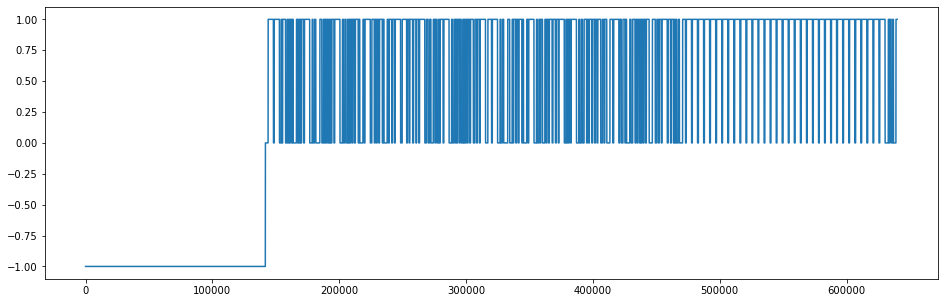

In [178]:
# Calculate bit level thresholds
levels = [(1 * (x > 900)) if x > 400 else -1 for x in fsk]
fig = plt.figure(figsize=(16,5))
plt.plot(list(range(len(levels))), levels)

bitstring 011000001010101101111100010010000011000101010101101111110010010010101010011110000101111110011010110111010001101101101111110011111110111011101101111110110010001111000111111111100010110011010010101011011101101101111110001111111111000100100001100010110110111010001011111100010110100010110111011011101111100101010111111001001001111101101101101110011011000111011111101101111000010011101011001111011100001110010110111111011111100100100001110111111111111011111101111101111110111111011111011111101111111111110111111011111011111101111110111110111111011111011111101111110111110111111011111111111101111110111110111111011111101111101111110111110111111011111101111100001010010011
Flag `«|H1U¿$ªx_ÝoÏîíû#Çþ,Ò­Û~?ñ!nñh·nùWäm¹±ß·ë=Ãýù!ßþý÷ïß~ÿ÷ï¿~û÷ß¿}ûÿß¾ýûïß~ýð¤


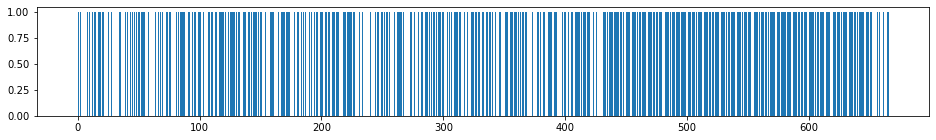

In [179]:
# Start at middle of first bit, and step every bit length
starting_sample_point = int(160000+500 + 0.5*samples_per_bit) # emprically measured
bits = levels[starting_sample_point::samples_per_bit] # start:stop:step

fig = plt.figure(figsize=(16,2))
plt.bar(list(range(len(bits))), bits)

# Read out bits
bitstring = ''.join(map(str, bits))
print('bitstring', bitstring)

def convert_to_ascii(bb, ll=8):
    message = ""
    while bb != "":
        i = chr(int(bb[:ll], 2))
        message = message + i
        bb = bb[ll:]
    return message

print("Flag", convert_to_ascii(bitstring))